In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
def bisection(f, a, b, tol=1.0e-8, nmax=500):
    n = 0
    while n <= nmax:
        c = (a + b) / 2.0
        if f(a) * f(c) < 0: # 2 evals
            b = c
        else:
            a = c
        if f(c) == 0.0 or (b - a) / 2.0 < tol:
            return c
        n += 1
    raise RuntimeError('no root found using', nmax, 'iterations')

0.5671432763338089


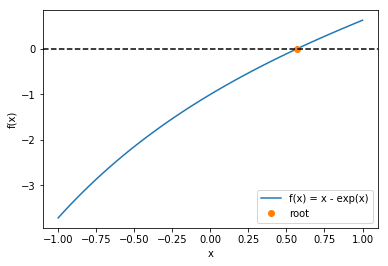

In [178]:
def f(x):
    return x - np.exp(-x)

root = bisection(f, -1., 1)
print(root)

x = np.linspace(-1.0, 1.0, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, f(x), label='f(x) = x - exp(x)')
ax.plot(root, f(root), 'o', label='root')
ax.axhline(y=0.0, color='black', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend(loc='lower right')

In [70]:
def secant_method(f, a, b, tol=1.0e-8, nmax=500):
    n = 0
    while n <= nmax:
        c = (f(b) * a - f(a) * b) / (f(b) - f(a))
        a = b
        b = c
        if f(b) == 0.0 or abs(b - a) < tol:
            return b
        n += 1
    raise RuntimeError('no root found using', nmax, 'iterations')

In [71]:
def f(x):
    return x - np.exp(-x)

root = secant_method(f, -1.0, 1.0)
print(root)

0.56714329041


In [72]:
def regula_falsi(f, a, b, tol=1.0e-8, nmax=500):
    n = 0
    while n <= nmax:
        c = (f(b) * a - f(a) * b) / (f(b) - f(a))
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        if f(c) == 0.0 or abs(b - a) < tol:
            return c
        n += 1
    raise RuntimeError('no root found using', nmax, 'iterations')

In [73]:
def f(x):
    return x - np.exp(-x)

root = regula_falsi(f, -1.0, 1.0)
print(root)

0.56714329041


In [74]:
def newton_raphson_an(f, df, x0, tol=1.0e-8, nmax=500):
    n = 0
    while n <= nmax:
        x1 = x0 - f(x0) / df(x0)
        if f(x1) == 0 or abs(x1 - x0) < tol:
            return x1
        x0 = x1
        n += 1
    raise RuntimeError('no root found using', nmax, 'iterations')

In [75]:
def f(x):
    return x - np.exp(-x)

def df(x):
    return 1 + np.exp(-x)

root = newton_raphson_an(f, df, -10.0)
print(root)

0.56714329041


In [76]:
def num_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def newton_raphson_num(f, x0, tol=1.0e-8, nmax=100):
    n = 0
    while n <= nmax:
        x1 = x0 - f(x0) / num_diff(f, x0, 1.0e-6)
        if f(x1) == 0 or abs(x1 - x0) < tol:
            return x1
        x0 = x1
        n += 1
    raise RuntimeError('no root found using', nmax, 'iterations')

In [77]:
def f(x):
    return x - np.exp(-x)

root = newton_raphson_num(f, -10.0)
print(root)

0.56714329041


In [103]:
def df_dx(f, x, y, h):
    return (f(x + h, y) - f(x, y)) / h

def df_dy(f, x, y, h):
    return (f(x, y + h) - f(x, y)) / h

def newton_raphson_2d(f1, f2, x0=0, y0=0, tol=1.0e-8, nmax=500):
    n = 0
    J = np.zeros((2, 2))
    b = np.zeros(2)
    while n <= nmax:
        J[0][0] = df_dx(f1, x0, y0, 1.0e-6)
        J[0][1] = df_dy(f1, x0, y0, 1.0e-6)
        J[1][0] = df_dx(f2, x0, y0, 1.0e-6)
        J[1][1] = df_dy(f2, x0, y0, 1.0e-6)
        b[0] = -f1(x0, y0)
        b[1] = -f2(x0, y0)
        delta = np.linalg.solve(J, b)
        x1 = x0 + delta[0]
        y1 = y0 + delta[1]
        if f1(x1, y1) == 0.0 and f2(x1, y1) == 0.0 or max(abs(x1 - x0), abs(y1 - y0)) < tol:
            return x1, y1
        x0 = x1
        y0 = y1
        n += 1
    raise RuntimeError('no root found using', nmax, 'iterations')

0.637107845297 0.718818718692


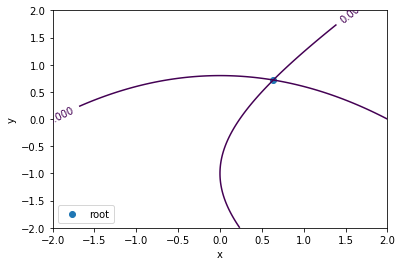

In [181]:
def f1(x, y):
    return x**2 + 4*x - y**2 - 2*y - 1

def f2(x, y):
    return x**2 + 5*y - 4

x_root, y_root = newton_raphson_2d(f1, f2)
print(x_root, y_root)

x = np.linspace(-2.0, 2.0, 1000)
y = np.linspace(-2.0, 2.0, 1000)
X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
a = ax.contour(X, Y, Z2, 0.0)
b = ax.contour(X, Y, Z1, 0.0)
ax.clabel(a)
ax.clabel(b)
ax.scatter(x_root, y_root, label='root')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')